# Clustering My Most Played Spotify Songs

This notebook will be for creating a clustering model for my most played Spotify songs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('SongDataForModel.csv')

In [3]:
df.head()

,trackName,artistName,id,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,playCount
0,100k,The Loved Ones,1LofCVLTwOF6SikmM7STkb,0.463,0.954,-4.513,0.0449,0.003220,0.3890,0.793,99.938,10
1,155,+44,3DPBEiVe1lzl8MP0NDVM7R,0.462,0.936,-3.604,0.0429,0.001730,0.3730,0.546,155.017,25
2,17 Girls In A Row,Steel Panther,07vFoIywXHy1umQJeYUmiS,0.559,0.926,-3.310,0.0559,0.000015,0.0779,0.637,99.985,13
3,241,Reel Big Fish,4mxff4HQLQ1fMEUvwblzst,0.729,0.614,-7.236,0.0544,0.013400,0.0616,0.964,138.786,10
4,3-D,Stranger,7r5wep1TKafUObN3pEBFaW,0.560,0.772,-6.096,0.0836,0.037500,0.1560,0.788,170.080,13


### Model Creation

In [6]:
play_counts = df['playCount']

features_for_cluster = df.columns.drop(['trackName', 'artistName', 'id', 'playCount'])

X = df[features_for_cluster]

In [7]:
X.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.463,0.954,-4.513,0.0449,0.003220,0.3890,0.793,99.938
1,0.462,0.936,-3.604,0.0429,0.001730,0.3730,0.546,155.017
2,0.559,0.926,-3.310,0.0559,0.000015,0.0779,0.637,99.985
3,0.729,0.614,-7.236,0.0544,0.013400,0.0616,0.964,138.786
4,0.560,0.772,-6.096,0.0836,0.037500,0.1560,0.788,170.080


In [10]:
scaler = StandardScaler()

preprocessing = ColumnTransformer([
    ('scaler', scaler, X.columns),
])

<AxesSubplot:>

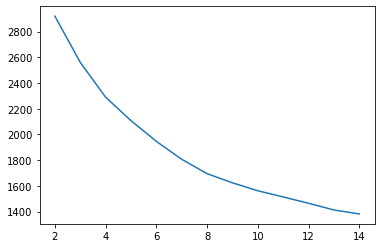

In [11]:
ssd = []
N = 15

for i in range(2, N):
    kmeans_pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('kmeans', KMeans(n_clusters=i))
    ])
    
    clusters = kmeans_pipeline.fit_predict(X)
    
    inertia = kmeans_pipeline[1].inertia_
    
    ssd.append(inertia)

ssd_series = pd.Series(data=ssd, index=range(2, len(ssd)+2))

sns.lineplot(data=ssd_series, x=ssd_series.index, y=ssd_series.values)    

There is no definite elbow point here. To refrain from going too high, I will choose k=6.

In [12]:
k=6

kmeans_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('kmeans', KMeans(n_clusters=k))
])

clusters = kmeans_pipeline.fit_predict(X)

cluster_centers = kmeans_pipeline[1].cluster_centers_

In [13]:
pd.Series(clusters).value_counts()

2    125
3    123
4    103
0     56
1     26
5     21
dtype: int64

In [28]:
cluster_centers_original = kmeans_pipeline[0].transformers_[0][1].inverse_transform(cluster_centers)

pd.DataFrame(cluster_centers_original, columns=X.columns)

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.482679,0.690100,-9.833214,0.042148,0.015991,0.202904,0.579161,130.844375
1,0.378385,0.916923,-6.047615,0.098604,0.008089,0.653923,0.426615,142.079500
2,0.431008,0.918288,-4.715416,0.078566,0.007257,0.188914,0.332109,112.097936
3,0.532447,0.923033,-4.852016,0.066180,0.009661,0.192511,0.651504,124.643211
4,0.362097,0.936981,-4.269388,0.113756,0.007528,0.201303,0.457367,169.383825
5,0.574048,0.785000,-7.454381,0.044357,0.171762,0.262719,0.684619,127.757143


In [33]:
from joblib import dump

In [34]:
dump(kmeans_pipeline, 'KMeansModel.joblib') # save the model

['KMeansModel.joblib']